In [1]:
from GP_class import GaussianProcessRegressor
import gp_plot
import numpy as np

In [2]:
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
def f(x):
    return np.sin(x)
Y_train = f(X_train)
# default is non-noise:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, Y_train)


use scipy minimize to optimize

In [4]:
res = gpr.optim_np()
print(res)

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 0.6864666319124364
        x: [ 2.490e+00  1.660e+00]
      nit: 12
      jac: [ 6.554e-04  1.000e-03]
     nfev: 147
     njev: 49
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


2.4897008908686207 1.6598490423293095


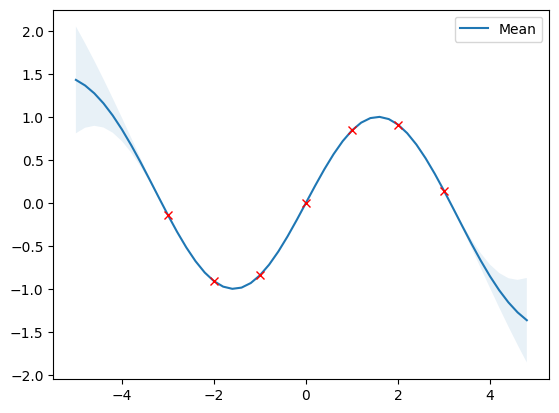

In [5]:
print(gpr.l, gpr.sigma_f)
mu_s, cov_s = gpr.predict(X, return_cov=True)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

with noise:

In [6]:
noise = 0.2
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)
Y_train = Y_train.ravel()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 4.795213828813221
        x: [ 1.331e+00  7.124e-01]
      nit: 7
      jac: [ 1.776e-07  0.000e+00]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
[ 0.18317627  0.21289751  0.23860712  0.25667173  0.2630824   0.25381086
  0.2252532   0.1747125   0.10085641  0.00408123 -0.11327836 -0.24693467
 -0.39083906 -0.537561   -0.67880695 -0.80601531 -0.91096072 -0.98631134
 -1.02610211 -1.02610846 -0.98412197 -0.90013645 -0.7764492  -0.61767033
 -0.43061919 -0.22407868 -0.008381    0.20518469  0.40512392  0.5805949
  0.72228871  0.82322786  0.87937753  0.88998151  0.8575698   0.78763088
  0.68798935  0.56797086  0.43746327  0.30599204  0.18191827  0.07184257
 -0.01973693 -0.09050358 -0.14016441 -0.17010953 -0.18295854 -0.18206704
 -0.17105862 -0.15343208] [[ 4.35027386e-01  4.14047409e-01  3.81526621e-01 ... -8.05934953e-05
  -3.10109723e-05  7.44624900e-06]
 

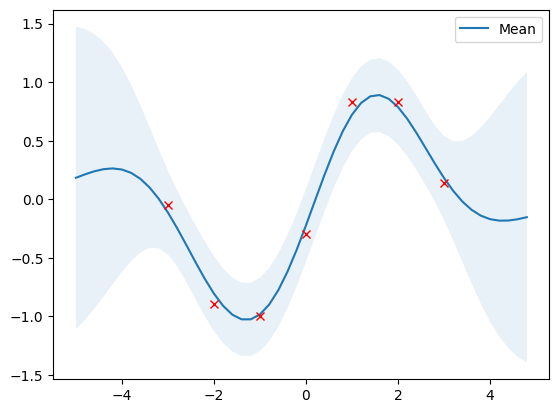

In [7]:
gpr = GaussianProcessRegressor(sigma_y=noise)
gpr.fit(X_train, Y_train)
res = gpr.optim_np()
print(res)
mu_s, cov_s = gpr.predict(X, return_cov=True)
print(mu_s, cov_s)
gp_plot.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)